# DSCI-235 Final Project

## Team Members: Thomas Elston

### Github Repo: https://github.com/ThomasElston/DSCI235Final

In this notebook, I will sort through data of past Fortnite esports players from 2019 to determine who I think was the best player of that year was.

In [319]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

The data is hosted in the repo as the file was quite large, accessable in the repo to view and grabbed via the link below.

In [320]:
df = pd.read_csv("https://raw.githubusercontent.com/ThomasElston/DSCI235Final/main/Fortnite_players_stats.csv")
df.head()

,Player,Solo score,Solo top1,Solo kd,Solo winRatio,Solo matches,Solo kills,Solo minutesPlayed,Duos score,Duos top1,...,Squads kills,Squads minutesPlayed,LTM score,LTM top1,LTM top3,LTM kd,LTM winRatio,LTM matches,LTM kills,LTM minutesPlayed
0,Prospеring,2476763,1828,4.37,18.0,10150,36328,81389,4702684,5584,...,75787.0,117967.0,101589.0,170.0,118.0,5.78,26.8,634.0,2682.0,2865.0
1,BH nixxxay,439562,1694,8.71,29.1,5817,35895,12732,4065613,4141,...,117327.0,150439.0,151358.0,229.0,190.0,8.20,18.2,1259.0,8442.0,4206.0
2,Raпger,4519465,4582,9.60,34.0,13488,85481,122171,1137279,1390,...,76065.0,86684.0,452136.0,1180.0,818.0,11.12,32.9,3583.0,26726.0,12273.0
3,Idk_Pi,752869,121,0.84,3.3,3687,3005,32453,5326457,2249,...,6892.0,80016.0,1748407.0,190.0,246.0,2.33,5.4,3539.0,7787.0,33224.0
4,Twitch.GryphonRB,1136282,1327,6.32,30.0,4429,19591,36245,3692623,5743,...,46068.0,81424.0,556721.0,824.0,600.0,14.99,53.3,1546.0,10826.0,12019.0


Deleting unnecessary columns from the dataframe. (The LTM columns are unnecessary because they are casual game modes that do not portray a players skill.)

In [321]:
fortniteStats = df
fortniteStats = fortniteStats.drop(columns=['Solo score', 'Duos score', 'Trios score', 'Squads score', 'LTM score', 'LTM top1', 'LTM top3', 'LTM kd', 'LTM winRatio', 'LTM matches', 'LTM kills', 'LTM minutesPlayed'])

### Who was the best solos player in the world at the time?

In [322]:
print("For our purposes, the best solos player in the world would be considered the player with the most wins in the solos category overall. Which is: ")
fortniteStats.sort_values('Solo top1', ascending = False).head(5)[['Player', 'Solo top1']]

For our purposes, the best solos player in the world would be considered the player with the most wins in the solos category overall. Which is: 


,Player,Solo top1
8,ᴮᵒˢˢン,6480
331,dEAABLESS,5034
2,Raпger,4582
245,give me pasta,4486
11,DarkAssaSSin._,4295


### Who was the best duos player in the world at the time?

In [323]:
print("For our purposes, the best duos player in the world would be considered the player with the most wins in the duos category overall. Which is: ")
fortniteStats.sort_values('Duos top1', ascending = False).head(5)[['Player', 'Duos top1']]

For our purposes, the best duos player in the world would be considered the player with the most wins in the duos category overall. Which is: 


,Player,Duos top1
543,Twitch_PuZiiyoッ,7594
4,Twitch.GryphonRB,5743
0,Prospеring,5584
7,NiteGamerYT 190k,5449
18,Scribell,4819


### Who was the best trios player in the world at the time?

In [324]:
print("For our purposes, the best trios player in the world would be considered the player with the most wins in the trios category overall. Which is: ")
fortniteStats.sort_values('Trios top1', ascending = False).head(5)[['Player', 'Trios top1']]

For our purposes, the best trios player in the world would be considered the player with the most wins in the trios category overall. Which is: 


,Player,Trios top1
135,TSM EmadGG,915.0
4,Twitch.GryphonRB,900.0
1101,GW_Lettuce,890.0
645,dann,731.0
2,Raпger,716.0


### Who was the best squads player in the world at the time?

In [325]:
print("For our purposes, the best squads player in the world would be considered the player with the most wins in the squads category overall. Which is: ")
fortniteStats.sort_values('Squads top1', ascending = False).head(5)[['Player', 'Squads top1']]

For our purposes, the best squads player in the world would be considered the player with the most wins in the squads category overall. Which is: 


,Player,Squads top1
0,Prospеring,5116.0
1,BH nixxxay,4978.0
2,Raпger,4435.0
4,Twitch.GryphonRB,3445.0
1027,Ninja,2724.0


### Which players have the most wins throughout all gamemodes?

In [326]:
print("The top 5 players with the most combined wins across all gamemodes was: ")
fortniteStats = fortniteStats.assign(allTimeWins=fortniteStats['Solo top1'] + fortniteStats['Duos top1'] + fortniteStats['Trios top1'] + fortniteStats['Squads top1'])
fortniteStats.sort_values('allTimeWins', ascending = False).head(5)[['Player', 'allTimeWins']]

The top 5 players with the most combined wins across all gamemodes was: 


,Player,allTimeWins
0,Prospеring,12772.0
4,Twitch.GryphonRB,11415.0
2,Raпger,11123.0
1,BH nixxxay,10817.0
543,Twitch_PuZiiyoッ,8138.0


### Which players have the most kills throughout all gamemodes?

In [327]:
print("The top 5 players with the most combined kills across all gamemodes was: ")
fortniteStats = fortniteStats.assign(allTimeKills=fortniteStats['Solo kills'] + fortniteStats['Duos kills'] + fortniteStats['Trios kills'] + fortniteStats['Squads kills'])
fortniteStats.sort_values('allTimeKills', ascending = False).head(5)[['Player', 'allTimeKills']]

The top 5 players with the most combined kills across all gamemodes was: 


,Player,allTimeKills
1,BH nixxxay,296689.0
2,Raпger,204146.0
6,FaZe Replays,201431.0
0,Prospеring,186836.0
254,semm1234,144703.0


### From all 4 game modes on average who had the most kills per minute?

In [328]:
print("The top 5 players with the most kills per minute was: ")
fortniteStats = fortniteStats.assign(totalPlayTime=fortniteStats['Solo minutesPlayed'] + fortniteStats['Duos minutesPlayed'] + fortniteStats['Trios minutesPlayed'] + fortniteStats['Squads minutesPlayed'])
fortniteStats = fortniteStats.assign(killsPerMin=fortniteStats['allTimeKills'] / fortniteStats['totalPlayTime'])
fortniteStats.sort_values('killsPerMin', ascending = False).head(5)[['Player', 'killsPerMin']]

The top 5 players with the most kills per minute was: 


,Player,killsPerMin
1027,Ninja,1.393031
254,semm1234,1.110878
1,BH nixxxay,1.048164
231,jmoe161 TV,0.995841
122,Avxry,0.859098


### From all 4 game modes on average who had the highest average win percentage in their games?

In [329]:
print("The top 5 players with the highest average win percentage in their games was: ")
fortniteStats = fortniteStats.assign(winPercentage = (fortniteStats['Solo winRatio'] + fortniteStats['Duos winRatio'] + fortniteStats['Trios winRatio'] + fortniteStats['Squads winRatio'])/4)
fortniteStats.sort_values('winPercentage', ascending = False).head(5)[['Player', 'winPercentage']]

The top 5 players with the highest average win percentage in their games was: 


,Player,winPercentage
4,Twitch.GryphonRB,48.825
50,ManuelXD -,44.675
543,Twitch_PuZiiyoッ,37.925
345,Prince Strap,37.200
559,Ｌ３ＮＮ,35.375


### Analysis

From my experience playing this game and getting to know the high level players in the scene, some of these numbers actually shocked me. While names like "Twith.GryphonRB, Prospering, and Ranger" have been know for there kills and number of wins it actually wasn't that much of a suprise to see them at the top of the leaderboards here. What did come as a suprise was the "Kills per Minute" dataframe, kills per minute is not a usual metric to rank player by as that usually doesn't translate into points on a leaderboard, however, I included it as an intresting measurement to give the pro players that hadn't played as much to recieve some reconition. Seeing "ninja" at the top of this measurement was very intresting especially how far above second place he was placing, looking deeper into this I realized that ninja's play time was actually less than most pro players and that would have helped contributed to this. We also see ninja in the bottom of the best squads players dataframe but this I consider to be less of a suprise as this was his gamemode of choice for a long while.

## Celebrity vs Celebrity

For this next part I wanted to find hand chosen Fortnite playing celebrities and match them up to see which celebrity was the best. A player in this is classified as a celebrity if the person has over 1,000,000 followers.

In [330]:
print("The 3 celebrities I choose are listed in the dataframe below:")
celeb = fortniteStats[(fortniteStats['Player'] == 'Ninja') | (fortniteStats['Player'] == 'SypherPK') | (fortniteStats['Player'] == 'liquid bugha 우')]
celeb

The 3 celebrities I choose are listed in the dataframe below:


,Player,Solo top1,Solo kd,Solo winRatio,Solo matches,Solo kills,Solo minutesPlayed,Duos top1,Duos kd,Duos winRatio,...,Squads kd,Squads winRatio,Squads matches,Squads kills,Squads minutesPlayed,allTimeWins,allTimeKills,totalPlayTime,killsPerMin,winPercentage
278,SypherPK,4115,7.16,28.5,14436,73948,65186,1227,6.66,28.0,...,4.20,18.2,5051.0,17360.0,32468.0,6412.0,115455.0,134865.0,0.856078,21.875
351,liquid bugha 우,935,2.71,7.1,13221,33335,84584,396,1.84,6.3,...,2.54,9.4,1426.0,3285.0,11640.0,1469.0,47631.0,138305.0,0.344391,6.625
1027,Ninja,2234,9.21,29.7,7511,48620,21730,2722,9.90,38.2,...,8.98,36.2,7522.0,43089.0,39438.0,7729.0,136134.0,97725.0,1.393031,31.250


Lets see how they stack up against each other using the 5 columns we added.

### All Time Wins

/Users/thomaselston/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50864 (\N{HANGUL SYLLABLE U}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


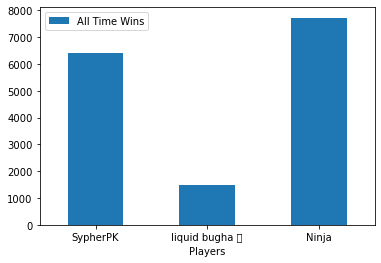

In [331]:
df = pd.DataFrame({'Players': celeb['Player'], 'All Time Wins': celeb['allTimeWins']})
ax = df.plot.bar(x='Players', y='All Time Wins', rot=0)

### All Time Kills

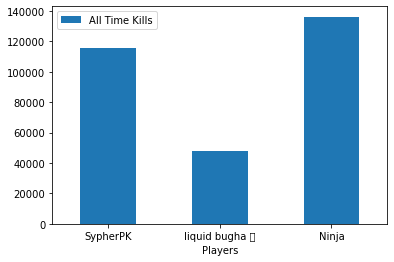

In [332]:
df = pd.DataFrame({'Players': celeb['Player'], 'All Time Kills': celeb['allTimeKills']})
ax = df.plot.bar(x='Players', y='All Time Kills', rot=0)

### Total Play Time

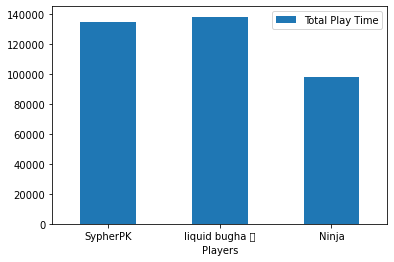

In [333]:
df = pd.DataFrame({'Players': celeb['Player'], 'Total Play Time': celeb['totalPlayTime']})
ax = df.plot.bar(x='Players', y='Total Play Time', rot=0)

### Kills Per Minute

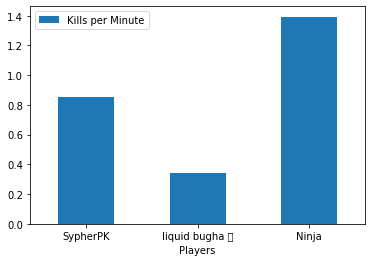

In [334]:
df = pd.DataFrame({'Players': celeb['Player'], 'Kills per Minute': celeb['killsPerMin']})
ax = df.plot.bar(x='Players', y='Kills per Minute', rot=0)

### Win Percentage

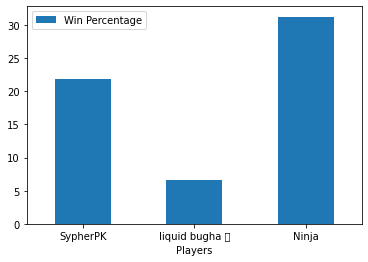

In [335]:
df = pd.DataFrame({'Players': celeb['Player'], 'Win Percentage': celeb['winPercentage']})
ax = df.plot.bar(x='Players', y='Win Percentage', rot=0)

### Analysis

Essentially what I can gather from these graphs is that in all categories here the player known as Ninja is the clear winner. With SypherPK on his tail and liquid bugha in dead last. So from the data between the 3 of them I would proclaim Ninja as the best of the celebrities here as in all graphs he was on top including the graph "Total Play Time" as the less the play time is actually better for this statistic. Meaning that Ninja was able to do more in a quicker period of time. It was very suprising to see liquid bugha so far from the rest of the competiton in these graphs as of 2019 when this data was taken he actually won the title of "World's best Fortnite Player" at the Fortnite World Cup. Despite having a lack of wins and kills I believe the data doesn't show the whole picture here as there could have been plenty of other gamemode liquid bugha could have been playing instead to achieve his skill level. SypherPK in these graphs wasn't a suprise at all as you would constantly see him playing with ninja and so them having stats so close to each other makes sense. 

## Me VS The World

In this section of the anaylsis I have gathered my own personal data from the same site the original data was gathered from. With my data im going to compare my self to the top 1500 players in the world, to see how I would currently fair against the worlds best players.

### Adding my personal stats

In [336]:
dict = {'Player':['Beefman101'],
        'Solo top1':[310],
        'Solo kd':[1.87],
        'Solo winRatio':[2.84],
        'Solo matches':[4613],
        'Solo kills':[9798],
        'Solo minutesPlayed':[18170],
        'Duos top1':[165],
        'Duos kd':[1.82],
        'Duos winRatio':[4.86],
        'Duos matches':[3393],
        'Duos kills':[7469],
        'Duos minutesPlayed':[13363],
        'Trios top1':[32],
        'Trios kd':[2.67],
        'Trios winRatio':[10.3],
        'Trios matches':[310],
        'Trios kills':[741],
        'Trios minutesPlayed':[1221],
        'Squads top1':[69],
        'Squads kd':[2.03],
        'Squads winRatio':[4.62],
        'Squads matches':[1492],
        'Squads kills':[2891],
        'Squads minutesPlayed':[5166],
        'allTimeWins':[576],
        'allTimeKills':[27831],
        'totalPlayTime':[37920],
        'killsPerMin':[0.733940],
        'winPercentage':[5.655]
       }

me = pd.DataFrame(dict)
me

,Player,Solo top1,Solo kd,Solo winRatio,Solo matches,Solo kills,Solo minutesPlayed,Duos top1,Duos kd,Duos winRatio,...,Squads kd,Squads winRatio,Squads matches,Squads kills,Squads minutesPlayed,allTimeWins,allTimeKills,totalPlayTime,killsPerMin,winPercentage
0,Beefman101,310,1.87,2.84,4613,9798,18170,165,1.82,4.86,...,2.03,4.62,1492,2891,5166,576,27831,37920,0.73394,5.655


### Mean all data from the 1500 players

In [337]:
averageStats = fortniteStats.loc[:, fortniteStats.columns != 'Player'].mean()
averageStats = pd.DataFrame(averageStats)
averageStats = averageStats.transpose()
me = pd.concat([averageStats, me], ignore_index = True)
me.reset_index()
me.loc[0,'Player'] = 'Pro Average'
me.loc[1,'Player'] = 'Me'
averageStats

,Solo top1,Solo kd,Solo winRatio,Solo matches,Solo kills,Solo minutesPlayed,Duos top1,Duos kd,Duos winRatio,Duos matches,...,Squads kd,Squads winRatio,Squads matches,Squads kills,Squads minutesPlayed,allTimeWins,allTimeKills,totalPlayTime,killsPerMin,winPercentage
0,328.909408,1.8163,4.853937,6911.060627,11781.843206,43517.135889,836.602787,2.483686,11.185226,7903.974913,...,2.05569,7.046234,6050.590656,11401.596932,40738.556485,1705.982991,41179.600992,150185.754075,0.283013,8.36747


### All Time Wins

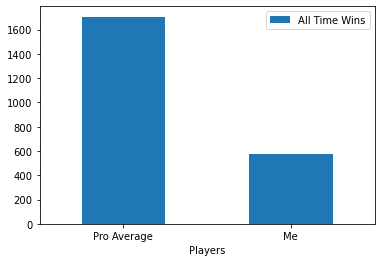

In [338]:
df = pd.DataFrame({'Players': me['Player'], 'All Time Wins': me['allTimeWins']})
ax = df.plot.bar(x='Players', y='All Time Wins', rot=0)

### All Time Kills

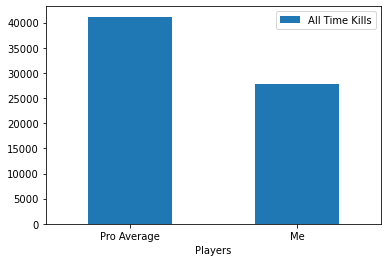

In [339]:
df = pd.DataFrame({'Players': me['Player'], 'All Time Kills': me['allTimeKills']})
ax = df.plot.bar(x='Players', y='All Time Kills', rot=0)

### Total Play Time

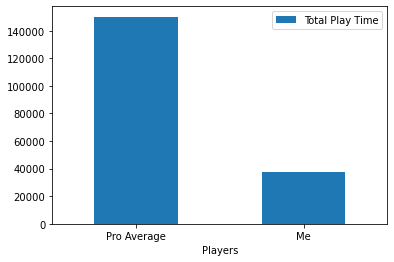

In [340]:
df = pd.DataFrame({'Players': me['Player'], 'Total Play Time': me['totalPlayTime']})
ax = df.plot.bar(x='Players', y='Total Play Time', rot=0)

### Kills Per Minute

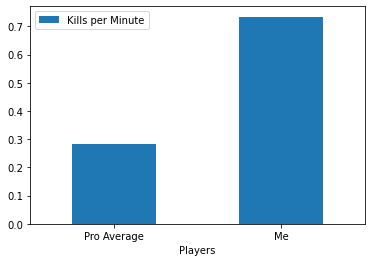

In [341]:
df = pd.DataFrame({'Players': me['Player'], 'Kills per Minute': me['killsPerMin']})
ax = df.plot.bar(x='Players', y='Kills per Minute', rot=0)

### Win Percentage

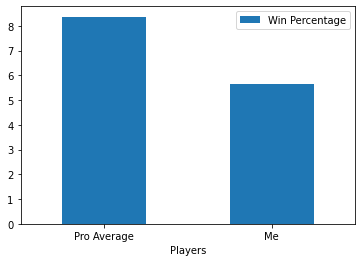

In [342]:
df = pd.DataFrame({'Players': me['Player'], 'Win Percentage': me['winPercentage']})
ax = df.plot.bar(x='Players', y='Win Percentage', rot=0)

### Analysis

I was genuinely very suprised when I saw the graphs of this data. It allowed me to see that I actually wasn't that far off from the pro scene and in some regaurds I was even beating them. The first graph shows that the average number of wins of a pro was around 1700 while I was stuck way down in the 500-600 range. After that the 2nd graph shows us the average all time kills which suprisingly I wasn't that far behind with the pros at about 41,000 to my 28,000 kills. The 3rd graph was the most suprising to me as it was the graph that tracked Total Play Time (in minutes). I had around 38,000 minutes of play time here with the pro's almost crushing me by 4x with 150,000 minutes of play time. This statistic was the most suprising because it showed me that even though I had 4 times less experience in the game as these pros I was putting up numbers in some regaurds that were a lot better that the pros when they were in my position. The 4th graph shows the Kills Per Minute which would be the play time in minutes divided by the total number of kills. For the pros in this situation they had an average kpm of 0.28 while I scored a kpm of 0.73 which is almost 3 times the average of the pros. This was probably the most defining stat of mine against the pros and one that I'll definately gloat to my friends. The the last graph was about the average Win Percentage which unfortunatley im not doing so well with only having a sub 6 percent win rate whilst the pros have a comfortable 8 percent win rate. These graphs showed me alot about how I relate to the pro players in my scene and how much I still need to improve in order to compete and the highest level.

# Conclusion

This project has shown me alot about the pro Fortnite seen back in the day that I just wouldn't have know without looking into the data like this. While I learned a good deal about some of my favorite pro players to watch like Ninja. I was also able to compare myself with my own data to all of these pro players, which ended up being my favorite part of this analysis. I was very suprised with the results of the analysis of myself as back in the day I wouldn't have believed you if you told me I was actually comparable to some of these players. If I were to do this project again I think I would spend more time collecting multiple datasets and trying to merge them together before starting as that way I might be able to find different correlations in the data other than determining them based off of wins and kills.
    With that being said I think I have my answer to this project. With my choice of the best player of the year going to "Ninja". A player I thought had 0 chance of winning this, I choose this based of the kills per minute dataframe as well as the fact that his total play time was significantly less than his competition.